## Actividad 10 pto 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import Curves2D
from matplotlib import colors
import matplotlib.ticker as ticker

In [2]:
# Tamaño de visualización de los DataFrame

pd.options.display.max_rows = 80
pd.options.display.max_columns = 50

# Escribimos en latex

plt.rcParams['text.usetex'] = False

In [3]:
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
# Galaxias de la simu RefL0100N1504 en el bin de masas [10.6,10.8] esfericas, discoidales, intermedias y todad la población

esf  = [15350630, 15207474, 17086647, 17094054, 14407360, 16487718,
        16632264, 17097593, 15662112, 17136101, 16459278, 15457919,
        16120199, 15866157, 17068441, 16110817, 16895358, 16636196,
        17505528, 15878251, 14800188, 16707699, 17528946, 18412316,
        18399452, 17519777, 16981991, 15829793, 17765765, 16199413,
        17404785, 18080369, 16618996, 17651635, 18034408, 17401204,
        17799611, 17884044, 18143518, 17144123, 17545416, 17310808,
        16578043, 17441218, 16598385, 16106437, 16424324, 16692290,
        17445073, 18192270, 17480553, 17780224, 15804165, 16268671,
        16491888, 17366604, 17795987, 18382838, 16696730, 17511061,
        17473041, 17862869, 16504438, 18352115, 16062294, 17749095,
        16233063, 18171868, 17392884, 17535726, 17676396, 17791088,
        17752120, 17185904, 17374402, 17654556]

disc = [14674760, 15595158, 15611795, 17047718, 16850421, 17003691,
        16718086, 17045098, 17104296, 17313320, 15809550, 17302698,
        16116799, 16928821, 18281742, 17532642, 17627268, 17746162,
        17969165, 18335391, 17813434, 18330735, 16888475, 18169630,
        17662153, 16872251, 16024914, 18312497, 18000127, 17995799,
        16865319, 17007154, 17308557, 16227461, 17328254, 17320704,
        17352149, 17339024, 17488818, 18129274, 18283362, 17552186,
        17707803,  8719657, 17267398, 17851300, 18038631, 18099216,
        18146763, 18288549,  9925265, 16272994, 17793626, 16123378,
        16559174, 17810947, 18004918, 18299728, 18314859,  8856888,
         8970962, 17770183, 17808725, 17704711, 17879405, 18065713,
        17889273, 18018076, 18345325, 18401511, 17788553, 17966782,
        17997834, 18397263, 17710820, 18024023, 17448931, 18271268,
        18326937, 17377610, 18183769,  8653534, 17022391, 17277488,
        17715888, 18165555]

toda_la_poblacion = [14674760, 15101698, 15518506, 15595158, 14757929, 15350630,
                     15207474, 15358400, 15611795, 14097766, 17047718, 17071982,
                     17180648, 17086647, 17094054, 17140714, 14407360, 16850421,
                     17003691, 17089652, 17147637, 16487718, 16632264, 16718086,
                     17097593, 16925427, 17045098, 15662112, 17136101, 16459278,
                     16482628, 15457919, 17104296, 16120199, 17029974, 15866157,
                     16185808, 17068441, 16110817, 16390783, 16895358, 16996937,
                     17076839, 16636196, 17313320, 15809550, 16249622, 16653664,
                     17505528, 17686441, 18123020, 15878251, 14800188, 17302698,
                     16116799, 16928821, 16939581, 15819288, 16677354, 16707699,
                     17528946, 18281742, 18412316, 17532642, 17627268, 17746162,
                     17969165, 18399452, 17416021, 18335391,  8358440, 16650763,
                     17519777, 17813434, 18330735, 16981991, 17150753, 16888475,
                     15829793, 17765765, 18169630, 18317745, 16253921, 16199413,
                     17404785, 17630010, 17662153, 17718284, 18080369, 16872251,
                     17293007, 16024914, 16130870, 16618996, 16750449, 17651635,
                     17816033, 18034408, 18067707, 16627259, 17832606, 18312497,
                     17401204, 17799611, 18000127, 18115428, 16195197, 16409436,
                     17884044, 17995799, 18143518, 18440934, 16865319, 17007154,
                     16956975, 17144123, 17308557, 16169302, 16227461, 16662839,
                     17328254, 17545416, 18108607, 17310808, 17320704, 15984133,
                     16578043, 16604515, 17352149, 17363052, 17441218, 17339024,
                     17488818, 16598385, 16689343, 17881979, 18043220, 18048736,
                     18129274, 18283362, 17552186, 17707803, 17739741, 17827660,
                      8719657, 17267398, 16965345, 17079993, 17164303, 16106437,
                     16424324, 16036383, 16692290, 17851300, 18151088, 18188054,
                     17445073, 18010353, 18038631, 18085861, 18099216, 18146763,
                     18192270, 18288549, 18387572,  9925265, 15978820, 16272994,
                     16565964, 17480553, 17554489, 17780224, 17793626, 15804165,
                     16123378, 16268671, 16491888, 16559174, 17737061, 17760223,
                     17366604, 17700007, 17810947, 18004918, 18299728, 18314859,
                      8856888,  8970962, 17770183, 17783096, 17795987, 17808725,
                     18279145, 18382838, 17825366, 18423921, 16696730, 17511061,
                     17704711, 17763271, 17879405, 18065713, 17473041, 18029434,
                     17862869, 17889273, 18018076, 18345325, 18401511, 16504438,
                     17485458, 18063591, 18352115, 16062294, 17469550, 17788553,
                     17966782, 17997834, 16986867,  8960069, 17379781, 17749095,
                     16233063, 17418547, 17647764, 17668706, 18171868, 18397263,
                     15904404, 17392884, 17535726, 17542160, 17676396, 17710820,
                     18024023, 17448931, 17657622, 17682256, 17791088, 18271268,
                     18416570, 18447769, 18326937, 17377610, 17407790, 17752120,
                     17845683, 18002122, 18183769,  8860263,  8653534, 15490692,
                     16869603, 17022391, 17185904, 17277488, 17299380, 17374402,
                     17654556, 17715888, 18088612, 18165555]


intermedias = [15101698, 15518506, 14757929, 15358400, 14097766, 17071982,
               17180648, 17140714, 17089652, 17147637, 16925427, 16482628,
               17029974, 16185808, 16390783, 16996937, 17076839, 16249622,
               16653664, 17686441, 18123020, 16939581, 15819288, 16677354,
               17416021,  8358440, 16650763, 17150753, 18317745, 16253921,
               17630010, 17718284, 17293007, 16130870, 16750449, 17816033,
               18067707, 16627259, 17832606, 18115428, 16195197, 16409436,
               18440934, 16956975, 16169302, 16662839, 18108607, 15984133,
               16604515, 17363052, 16689343, 17881979, 18043220, 18048736,
               17739741, 17827660, 16965345, 17079993, 17164303, 16036383,
               18151088, 18188054, 18010353, 18085861, 18387572, 15978820,
               16565964, 17554489, 17737061, 17760223, 17700007, 17783096,
               18279145, 17825366, 18423921, 17763271, 18029434, 17485458,
               18063591, 17469550, 16986867,  8960069, 17379781, 17418547,
               17647764, 17668706, 15904404, 17542160, 17657622, 17682256,
               18416570, 18447769, 17407790, 17845683, 18002122,  8860263,
               15490692, 16869603, 17299380, 18088612]

In [5]:
# Importamos las tablas con la información pre y post merger de las galaxias 

In [6]:
path ='/home/ramiro/Datos guardados/Facultad/Tesis/Datos/Actividad 10/'

In [7]:
SUB = pd.read_csv(path+'Subhalo_maxmergers(desde_minor_merger).dat')
SIZ = pd.read_csv(path+'Sizes_maxmergers(desde_minor_merger).dat')
MOR = pd.read_csv(path+'MorphoKinem_maxmergers(desde_minor_merger).dat')
FOF = pd.read_csv(path+'FOF_maxmergers(desde_minor_merger).dat')

SUB_NON = pd.read_csv(path+'Subhalo_maxmergers(=1).dat')
SIZ_NON = pd.read_csv(path+'Sizes_maxmergers(=1).dat')
MOR_NON = pd.read_csv(path+'MorphoKinem_maxmergers(=1).dat')
FOF_NON = pd.read_csv(path+'FOF_maxmergers(=1).dat')

In [8]:
SUB

,GalaxyID_snap28,GalaxyID,Lm_max,GroupID,SubGroupNumber,LastProgID,TopLeafID,DescendantID,SnapNum,Stars_Mass,SF_Hydrogen,SF_Oxygen,Redshift,StarFormationRate,Stars_Metallicity,SF_Mass,NSF_Mass,BlackHoleMass,MassType_DM,SF_Metallicity,Vmax,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,HalfMassRad_Star,sSFR,SF_logOH,tiempo
0,9508202,9508215,1.157039,15000000000440,0,9509038,9508229,9508214,15,1.773696e+10,0.709703,0.009490,2.012410,16.127737,0.012401,1.573247e+10,5.870821e+10,3954130.80,8.796315e+11,0.019795,222.22745,3.842291,36.533490,61.997932,1.930014,9.092727e-10,8.922090,3.276224
1,9508202,9508214,1.157039,16000000000380,0,9509374,9508229,9508213,16,2.831789e+10,0.712242,0.008850,1.736966,25.052534,0.013665,2.458011e+10,9.109995e+10,6949432.50,1.294929e+12,0.018578,245.78386,3.852648,36.406124,61.648468,2.384034,8.846893e-10,8.890200,3.766854
2,9508202,9508212,1.325888,18000000000420,0,9509945,9508229,9508211,18,5.369650e+10,0.685220,0.013525,1.259332,24.382942,0.017543,1.944782e+10,1.415059e+11,22285008.00,2.160114e+12,0.030077,290.23130,4.134301,36.264244,60.933365,2.948536,4.540882e-10,9.091198,4.958277
3,9508202,9508211,1.325888,19000100000014,0,9510922,9508229,9508210,19,7.732419e+10,0.694976,0.011286,1.004122,4.518675,0.021047,6.765464e+09,8.061938e+10,77945016.00,2.009037e+12,0.025742,280.50333,4.366422,36.046780,60.468857,3.527880,5.843805e-11,9.006469,5.863787
4,9512113,9512130,1.643906,11000000000613,0,9512450,9512140,9512129,11,3.227855e+09,0.739749,0.003645,3.527976,7.137663,0.004241,8.176752e+09,2.661106e+10,597720.40,4.835113e+11,0.006369,213.68147,9.827008,34.368298,40.413452,2.224495,2.211272e-09,8.488534,1.794518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,10859653,10859668,1.179028,13000500001192,0,10859776,10859679,10859667,13,3.181758e+08,0.742204,0.002926,2.478413,0.187161,0.002043,3.945714e+08,5.784728e+09,482563.25,1.100582e+11,0.004859,108.37283,56.429960,48.200764,65.293520,2.750726,5.882301e-10,8.391675,2.652582
8420,12002343,12002359,1.255563,12000300000475,0,12002442,12002369,12002358,12,3.038363e+08,0.746785,0.001635,3.016504,1.042180,0.002204,1.690172e+09,9.168633e+09,156591.89,1.047841e+11,0.002659,123.61888,78.092020,7.308499,70.555340,3.167273,3.430071e-09,8.136205,2.144304
8421,12002343,12002358,1.255563,13000400000740,0,12002535,12002369,12002357,13,7.480112e+08,0.743693,0.002417,2.478413,1.490273,0.002986,2.511520e+09,1.087673e+10,311098.90,1.091274e+11,0.004121,120.63520,78.350250,7.305860,70.707670,3.584208,1.992314e-09,8.307847,2.652582
8422,12002343,12002348,1.332312,23000000004154,0,12002697,12002369,12002347,23,7.386258e+09,0.683160,0.013288,0.503107,0.960657,0.015095,1.601291e+09,3.022560e+09,714721.90,2.760664e+11,0.031050,132.24878,80.991680,7.729811,71.385410,3.391604,1.300600e-10,9.084809,8.603063


In [9]:
SIZ = SIZ.drop_duplicates()
MOR = MOR.drop_duplicates()
FOF = FOF.drop_duplicates()

SUB_NON = SUB_NON.drop_duplicates()
SIZ_NON = SIZ_NON.drop_duplicates()
MOR_NON = MOR_NON.drop_duplicates()
FOF_NON = FOF_NON.drop_duplicates()

In [10]:
#Intervalo de masas que nos interesa ver

mass_min,mass_max = 8,13

In [11]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que no sufrieron mergers
VAR_SUB_NON = pd.DataFrame(columns=['GalaxyID','GroupID','DescendantID','Lm','SnapNum','Redshift','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                    '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                    'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass/Star_Mass)'])

VAR_SUB_NON['GalaxyID'] = SUB_NON['GalaxyID']
VAR_SUB_NON['DescendantID'] = SUB_NON['DescendantID']
VAR_SUB_NON['GroupID'] = SUB_NON['GroupID']
VAR_SUB_NON['Lm'] = SUB_NON['Lm_max']
VAR_SUB_NON['SnapNum']=SUB_NON['SnapNum']
VAR_SUB_NON['Redshift']=SUB_NON['Redshift']
VAR_SUB_NON['SubGroupNumber'] = SUB_NON['SubGroupNumber']
VAR_SUB_NON['Log(Stars_Mass)'] = np.log10(SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB_NON['SF_Mass']+SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB_NON['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB_NON['12+Log(O/H)'] = 12+np.log10(SUB_NON['SF_Oxygen']/SUB_NON['SF_Hydrogen'])-np.log10(16)
VAR_SUB_NON['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB_NON['SF_Mass']/(SUB_NON['SF_Mass']+SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(StarFormationRate)'] = np.log10(SUB_NON['StarFormationRate'])
VAR_SUB_NON['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB_NON['StarFormationRate'])-np.log10(SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(BlackHoleMass/Star_Mass)'] = np.log10(SUB_NON['BlackHoleMass'])-np.log10(SUB_NON['Stars_Mass'])

In [12]:
# Separamos según las masas que nos interesa

masas = (VAR_SUB_NON['Log(Stars_Mass)']>mass_min)&(VAR_SUB_NON['Log(Stars_Mass)']<mass_max)

VAR_SUB_NON = VAR_SUB_NON[masas]

In [13]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que sufrieron mergers


VAR_SUB = pd.DataFrame(columns=['GalaxyID_snap28','GalaxyID','GroupID','DescendantID','Lm','SnapNum','Redshift','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass/Star_Mass)'])

VAR_SUB['GalaxyID_snap28']=SUB['GalaxyID_snap28']
VAR_SUB['GalaxyID'] = SUB['GalaxyID']
VAR_SUB['DescendantID'] = SUB['DescendantID']
VAR_SUB['GroupID'] = SUB['GroupID']
VAR_SUB['Lm'] = SUB['Lm_max']
VAR_SUB['SnapNum']=SUB['SnapNum']
VAR_SUB['Redshift']=SUB['Redshift']
VAR_SUB['SubGroupNumber'] = SUB['SubGroupNumber']
VAR_SUB['Log(Stars_Mass)'] = np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB['12+Log(O/H)'] = 12+np.log10(SUB['SF_Oxygen']/SUB['SF_Hydrogen'])-np.log10(16)
VAR_SUB['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB['SF_Mass']/(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(StarFormationRate)'] = np.log10(SUB['StarFormationRate'])
VAR_SUB['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB['StarFormationRate'])-np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(BlackHoleMass/Star_Mass)'] = np.log10(SUB['BlackHoleMass'])--np.log10(SUB['Stars_Mass'])

In [14]:
# Separamos según las masas que nos interesa

masas = (VAR_SUB['Log(Stars_Mass)']>mass_min)&(VAR_SUB['Log(Stars_Mass)']<mass_max)

VAR_SUB = VAR_SUB[masas].copy()

In [15]:
VAR_MOR = pd.merge(VAR_SUB,MOR, on = ['GalaxyID'])
VAR_SIZ = pd.merge(VAR_SUB,SIZ, on = ['GalaxyID'])
VAR_FOF = pd.merge(VAR_SUB,FOF, on = ['GroupID'])

VAR_MOR_NON = pd.merge(VAR_SUB_NON,MOR_NON)
VAR_SIZ_NON = pd.merge(VAR_SUB_NON,SIZ_NON)
VAR_FOF_NON = pd.merge(VAR_SUB_NON,FOF_NON)

In [16]:
# Separamos por morfología:
# Esfericas
VAR_SUB=VAR_SUB[(VAR_SUB['GalaxyID_snap28'].isin(disc))]
VAR_MOR=VAR_MOR[(VAR_MOR['GalaxyID_snap28'].isin(disc))]
VAR_SIZ=VAR_SIZ[(VAR_SIZ['GalaxyID_snap28'].isin(disc))]
# VAR_FOF=VAR_FOF[(VAR_FOF['GalaxyID_snap28'].isin(esf))]



In [17]:
VAR_MOR

,GalaxyID_snap28,GalaxyID,GroupID,DescendantID,Lm,SnapNum,Redshift,SubGroupNumber,Log(Stars_Mass),Log(SF_Mass+Stars_Mass),Log(Stars_Metallicity/Z_sun),12+Log(O/H),SF_Mass/(SF_Mass+Stars_Mass),Log(StarFormationRate),Log(StarFormationRate/Stars_Mass),Log(BlackHoleMass/Star_Mass),NSF_Mass,KappaCoRot,SubHaloGalaxyID
663,16865319,16865335,12000000001094,16865334,1.469462,12,3.016504,0,9.259763,10.076819,-0.895224,8.143288,0.847614,1.028072,-8.231691,15.281163,2.923442e+10,0.233447,16865335
664,16865319,16865331,16000000000499,16865330,1.483474,16,1.736966,0,10.206033,10.413130,-0.226401,8.813104,0.379269,0.812703,-9.393330,17.647070,6.983188e+10,0.340386,16865331
665,16865319,16865330,17000000000459,16865329,1.483474,17,1.486707,0,10.453558,10.661167,-0.179963,8.870018,0.380001,1.434100,-9.019458,18.035258,9.291572e+10,0.219090,16865330
850,16888475,16888490,13000300001023,16888489,1.204430,13,2.478413,0,8.770922,9.338859,-0.788165,8.404755,0.729565,0.024423,-8.746499,14.246913,8.468369e+09,0.196648,16888490
1498,17308557,17308567,18000000001677,17308566,1.218701,18,1.259332,0,9.839080,10.204873,-0.396093,8.763298,0.569268,0.783841,-9.055239,15.628241,4.164497e+10,0.343043,17308567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,17339024,17339035,17000000001322,17339034,1.204595,17,1.486707,0,9.784057,10.177464,-0.446526,8.677758,0.595803,0.890615,-8.893443,15.827060,4.353587e+10,0.309280,17339035
7303,18099216,18099226,18000000001902,18099225,1.552542,18,1.259332,0,9.817981,10.027739,-0.201934,8.945320,0.383062,0.419666,-9.398315,15.682597,3.007984e+10,0.371144,18099226
7304,18099216,18099225,19000200000086,18099224,1.552542,19,1.004122,0,10.090374,10.284641,-0.162822,8.940671,0.360659,0.610346,-9.480028,16.193215,4.569001e+10,0.485713,18099225
7305,18099216,18099219,25000000001029,18099218,1.112901,25,0.270901,0,10.497260,10.586098,-0.035965,9.101936,0.184993,0.677127,-9.820133,17.172701,8.382194e+10,0.542908,18099219


In [18]:
# Tabla con nuestras variables para las galaxias que NO sufrieron mergers

# dif_non_Log_SMs    = []
# dif_non_Log_SF_SMs = []
# dif_non_Log_S_MetZ = []
# dif_non_Log_OH     = []
# dif_non_SFfrac     = []
# dif_non_Log_SFR    = []
# dif_non_Log_sSFR   = []
# dif_non_Log_BH     = []
# dif_non_RHM30      = []
# dif_non_KcRot      = []

# for i in np.arange(0,int(len(VAR_SUB_NON))-1):
    
#     mask_ID = (VAR_SUB_NON['SnapNum']>=11)&((VAR_SUB_NON['DescendantID'] == VAR_SUB_NON['GalaxyID'].iloc[i+1])|(VAR_SUB_NON['GalaxyID'] == VAR_SUB_NON['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_SUB_NON[mask_ID])==int(2):
        
#         dif_non_Log_SMs.append(VAR_SUB_NON[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['Log(Stars_Mass)'].values[0])
#         dif_non_Log_SF_SMs.append(VAR_SUB_NON[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
#         dif_non_Log_S_MetZ.append(VAR_SUB_NON[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB_NON[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
#         dif_non_Log_OH.append(VAR_SUB_NON[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB_NON[mask_ID]['12+Log(O/H)'].values[0])
#         dif_non_SFfrac.append(VAR_SUB_NON[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
#         dif_non_Log_SFR.append(VAR_SUB_NON[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB_NON[mask_ID]['Log(StarFormationRate)'].values[0])
#         dif_non_Log_sSFR.append(VAR_SUB_NON[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
#         dif_non_Log_BH.append(VAR_SUB_NON[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[1]-VAR_SUB_NON[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[0])
    
# for i in np.arange(0,len(VAR_SIZ_NON)-1):
    
#     mask_ID = (VAR_SIZ_NON['SnapNum']>=12)&((VAR_SIZ_NON['DescendantID'] == VAR_SIZ_NON['GalaxyID'].iloc[i+1])|(VAR_SIZ_NON['GalaxyID'] == VAR_SIZ_NON['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_SIZ_NON[mask_ID])==int(2):
#         dif_non_RHM30.append(VAR_SIZ_NON[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ_NON[mask_ID]['R_halfmass30'].values[0])
    

# for i in np.arange(0,len(VAR_MOR_NON)-1):
    
#     mask_ID = (VAR_MOR_NON['SnapNum']>=11)&((VAR_MOR_NON['DescendantID'] == VAR_MOR_NON['GalaxyID'].iloc[i+1])|(VAR_MOR_NON['GalaxyID'] == VAR_MOR_NON['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_MOR_NON[mask_ID])==int(2):  
#         dif_non_KcRot.append(VAR_MOR_NON[mask_ID]['KappaCoRot'].values[1]-VAR_MOR_NON[mask_ID]['KappaCoRot'].values[0])

# Tabla con nuestras variables para las galaxias que sufrieron mergers(para todas las galaxias).

# dif_Log_SMs    = []
# dif_Log_SF_SMs = []
# dif_Log_S_MetZ = []
# dif_Log_OH     = []
# dif_SFfrac     = []
# dif_Log_SFR    = []
# dif_Log_sSFR   = []
# dif_Log_BH     = []
# dif_RHM30      = []
# dif_KcRot      = []

# for i in np.arange(0,int(len(VAR_SUB))-1):
    
#     mask_ID = (VAR_SUB['SnapNum']>=11)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_SUB[mask_ID])==int(2):
        
#         dif_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
#         dif_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
#         dif_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
#         dif_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
#         dif_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
#         dif_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
#         dif_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
#         dif_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[0])
    
# for i in np.arange(0,len(VAR_SIZ)-1):
    
#     mask_ID = (VAR_SIZ['SnapNum']>=11)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_SIZ[mask_ID])==int(2):
#         dif_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
    

# for i in np.arange(0,len(VAR_MOR)-1):
    
#     mask_ID = (VAR_MOR['SnapNum']>=12)&((VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i]))) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_MOR[mask_ID])==int(2):  
#         dif_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])
        


# Tabla con nuestras variables para las galaxias que sufrieron mayor mergers(Lm>1.25)

dif_mayor_Log_SMs    = []
dif_mayor_Log_SF_SMs = []
dif_mayor_Log_S_MetZ = []
dif_mayor_Log_OH     = []
dif_mayor_SFfrac     = []
dif_mayor_Log_SFR    = []
dif_mayor_Log_sSFR   = []
dif_mayor_Log_BH     = []
dif_mayor_RHM30      = []
dif_mayor_KcRot      = []
masas_sub            = [] #Masas post merger
masas_siz            = [] #Masas post merger
masas_mor            = [] #Masas post merger
red_sub              = []
red_siz              = []
red_mor              = []

for i in np.arange(0,int(len(VAR_SUB))-1):
    
    mask_ID = (VAR_SUB['SnapNum']>=11)&(VAR_SUB['Lm'] >=1.25)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
#     mask_ID = (VAR_SUB['SnapNum']>=12)&(VAR_SUB['Lm'] >=1.25)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i])&((VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])|(VAR_SUB['GalaxyID'] == VAR_SUB['GalaxyID'].iloc[i]))
    
    
    if len(VAR_SUB[mask_ID])==int(2):
        
        dif_mayor_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
        dif_mayor_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
        dif_mayor_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
        dif_mayor_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
        dif_mayor_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
        dif_mayor_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
        dif_mayor_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
        dif_mayor_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[0])
        masas_sub.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1])
        red_sub.append(VAR_SUB[mask_ID]['Redshift'].values[1])
    
for i in np.arange(0,len(VAR_SIZ)-1):
    
    mask_ID = (VAR_SIZ['SnapNum']>=11)&(VAR_SIZ['Lm'] >=1.25)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SIZ[mask_ID])==int(2):
        dif_mayor_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
        masas_siz.append(VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1])
        red_siz.append(VAR_SIZ[mask_ID]['Redshift'].values[1])

for i in np.arange(0,len(VAR_MOR)-1):
    
    mask_ID = (VAR_MOR['SnapNum']>=11)&(VAR_MOR['Lm'] >=1.25)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_MOR[mask_ID])==int(2):  
        dif_mayor_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])
        masas_mor.append(VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1])
        red_mor.append(VAR_MOR[mask_ID]['Redshift'].values[1])

# Tabla con nuestras variables para las galaxias que sufrieron minor mergers(1.1<Lm<1.25)

# dif_minor_Log_SMs    = []
# dif_minor_Log_SF_SMs = []
# dif_minor_Log_S_MetZ = []
# dif_minor_Log_OH     = []
# dif_minor_SFfrac     = []
# dif_minor_Log_SFR    = []
# dif_minor_Log_sSFR   = []
# dif_minor_Log_BH     = []
# dif_minor_RHM30      = []
# dif_minor_KcRot      = []

# for i in np.arange(0,int(len(VAR_SUB))-1):
    
#     mask_ID = (VAR_SUB['SnapNum']>=11)&(VAR_SUB['Lm'] <=1.25)&(VAR_SUB['Lm'] >=1.1)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_SUB[mask_ID])==int(2):
        
#         dif_minor_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
#         dif_minor_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
#         dif_minor_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
#         dif_minor_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
#         dif_minor_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
#         dif_minor_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
#         dif_minor_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
#         dif_minor_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[0])
    
# for i in np.arange(0,len(VAR_SIZ)-1):
    
#     mask_ID = (VAR_SIZ['SnapNum']>=11)&(VAR_SIZ['Lm'] <=1.25)&(VAR_SIZ['Lm'] >=1.1)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_SIZ[mask_ID])==int(2):
#         dif_minor_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
    

# for i in np.arange(0,len(VAR_MOR)-1):
    
#     mask_ID = (VAR_MOR['SnapNum']>=11)&(VAR_MOR['Lm'] <=1.25)&(VAR_MOR['Lm'] >=1.1)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_MOR[mask_ID])==int(2):  
#         dif_minor_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])
        
        
# Tabla con nuestras variables para las galaxias que sufrieron micro mergers(1.01<Lm<1.1)

# dif_micro_Log_SMs    = []
# dif_micro_Log_SF_SMs = []
# dif_micro_Log_S_MetZ = []
# dif_micro_Log_OH     = []
# dif_micro_SFfrac     = []
# dif_micro_Log_SFR    = []
# dif_micro_Log_sSFR   = []
# dif_micro_Log_BH     = []
# dif_micro_RHM30      = []
# dif_micro_KcRot      = []

# for i in np.arange(0,int(len(VAR_SUB))-1):
    
#     mask_ID = (VAR_SUB['SnapNum']>=12)&(VAR_SUB['Lm'] <=1.1)&(VAR_SUB['Lm'] >=1.01)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_SUB[mask_ID])==int(2):
        
#         dif_micro_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
#         dif_micro_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
#         dif_micro_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
#         dif_micro_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
#         dif_micro_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
#         dif_micro_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
#         dif_micro_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
#         dif_micro_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass/Star_Mass)'].values[0])
    
# for i in np.arange(0,len(VAR_SIZ)-1):
    
#     mask_ID = (VAR_SIZ['SnapNum']>=11)&(VAR_SIZ['Lm'] <=1.1)&(VAR_SIZ['Lm'] >=1.01)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_SIZ[mask_ID])==int(2):
#         dif_micro_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
    

# for i in np.arange(0,len(VAR_MOR)-1):
    
#     mask_ID = (VAR_MOR['SnapNum']>=11)&(VAR_MOR['Lm'] <=1.1)&(VAR_MOR['Lm'] >=1.01)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
#     if len(VAR_MOR[mask_ID])==int(2):  
#         dif_micro_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])

In [19]:
# Hacemos los histogramas de las diferencias de las magnitudes post y pre merger

In [20]:
# dif_non_Log_SMs[:2000]

In [21]:
# Las variables para proyecto de altas masas

dif_mayor = [dif_mayor_Log_BH, dif_mayor_KcRot]

dif_name  = [r'${\Delta}log(M_{BH}/M_{\bigstar})$',r'${\Delta}\kappa_{co}$']

In [22]:
# lim_var = [[min(dif_Log_SMs),max(dif_Log_SMs)],[min(dif_Log_SF_SMs),max(dif_Log_SF_SMs)],[min(dif_Log_S_MetZ),max(dif_Log_S_MetZ)],
#            [min(dif_Log_OH),max(dif_Log_OH)],  [min(dif_SFfrac),max(dif_SFfrac)],[-2,2],[-2,2],[-0.5,1.5],[min(dif_RHM30),max(dif_RHM30)],[min(dif_KcRot),max(dif_KcRot)]]

lim_var = [
             # [-0.1,1.1],    #dif_Log_SMs
#            [-0.1,0.9],    #dif_Log_SF_SMs
#            [-0.3,0.4],    #dif_Log_S_MetZ
           # [-0.4,0.5],    #dif_Log_OH
           # [-0.4,0.2],    #dif_SFfrac
           # [-1.5,1.5],    #dif_Log_SFR
           # [-2,1],    #dif_Log_sSFR
           [-0.5,1.4],    #dif_Log_BH
#            [-3,3],    #dif_RHM30
           [-0.5,0.3]
            ]            #dif_KcRot

NameError: name 'dif_minor' is not defined

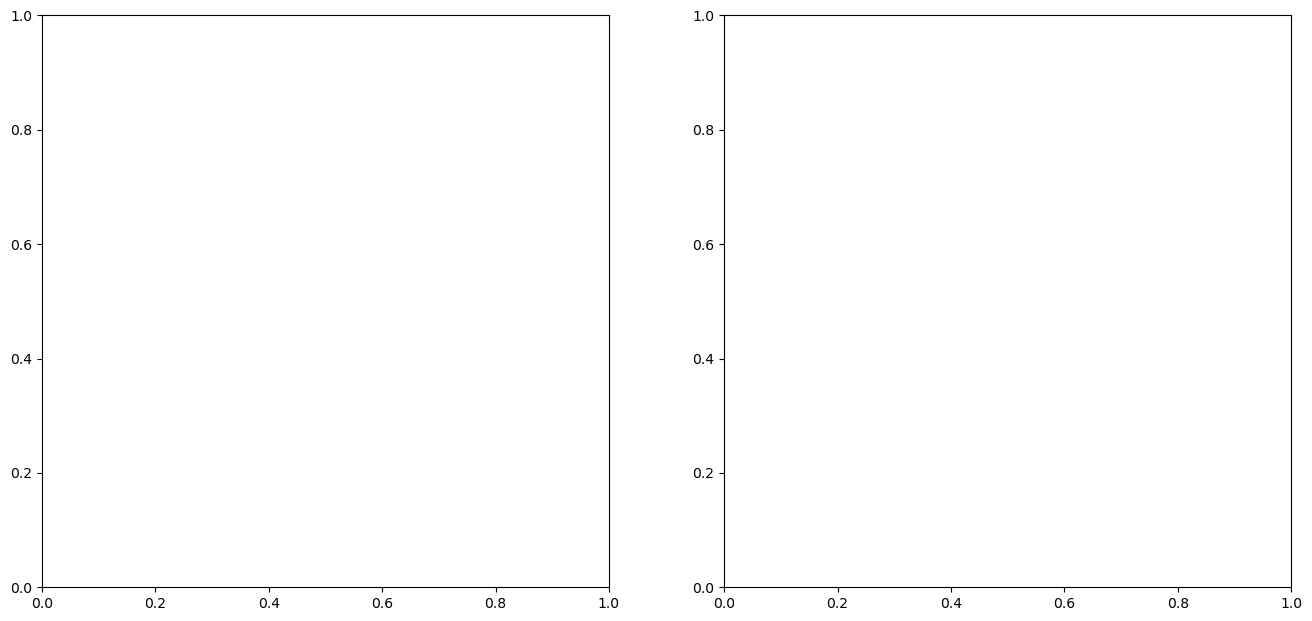

In [23]:
# Histogramas del las variables estudiadas

fig,ax = plt.subplots(1,2,figsize=(14,7))

ax = ax.flatten()

fig.tight_layout(pad=5)

# fontdict ={'fontsize': 40}

# fig.suptitle(r'$Histogramas~de~la~diferencia~entre~magnitudes~post~y~pre~merger~a~z<=3.~Masas~'+str(mass_min)+r'<log(M_\bigstar)<'+str(mass_max)+'.$',fontsize=20)

columnas=50


plt.subplots_adjust(hspace=0.01,left=0.05,top=0.95)



Mayor = True
Minor = False
Micro = False
Non   = False

# Lista con las alturas de los bines

altura_mayor = []
altura_minor = []
altura_micro = []
altura_non   = []

i=0
for mayor,minor,micro,non in zip(dif_mayor,dif_minor,dif_micro,dif_non):
    
    width=abs(lim_var[i][1]-lim_var[i][0])/columnas
    
    bins = np.arange(lim_var[i][0],lim_var[i][1],width)
    
    if Mayor:
        var = mayor
        
        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Major Merger',linestyle='-',color='red',linewidth=3,weights=weights)
        median_mayor = pd.Series(var).median(skipna=True)
        perc_inf    = pd.Series(var).quantile(0.25)
        perc_sup    = pd.Series(var).quantile(0.75)
        ax[i].axvline(x = median_mayor, color = 'red',linestyle='-')
        print('Medianas major',median_mayor,i)
#         ax[i].axvline(x = perc_inf, color = 'red',linestyle='--')
#         ax[i].axvline(x = perc_sup, color = 'red',linestyle='--')
        
#         h_var_mayor,b_mayor = np.histogram(var,bins,density=True)
#         ax[i].bar(b_mayor[:-1],height=h_var_mayor * np.diff(b_mayor),width =width,fill=False,color = 'red',edgecolor='red',capsize=4,linestyle='-',linewidth=2,label='Mayor Merger')
#         altura_mayor.append(h_var_mayor * np.diff(b_mayor))
    
    if Minor:
        var = minor

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Minor Merger',linestyle='--',color='purple',linewidth=3,weights=weights)
        median_minor = pd.Series(var).median(skipna=True)
        perc_inf    = pd.Series(var).quantile(0.25)
        perc_sup    = pd.Series(var).quantile(0.75)
        ax[i].axvline(x = median_minor, color = 'purple',linestyle='-')
        print('Medianas minor',median_minor,i)
#         ax[i].axvline(x = perc_inf, color = 'purple',linestyle='--')
#         ax[i].axvline(x = perc_sup, color = 'purple',linestyle='--')
        
        
#         h_var_minor,b_minor = np.histogram(var,bins,density=True)
#         ax[i].bar(b_minor[:-1],height=h_var_minor * np.diff(b_minor),width =width,fill=False,edgecolor='blue',capsize=4,linestyle='--',linewidth=2,label='Minor Merger')
#         altura_minor.append(h_var_minor * np.diff(b_minor))
        
    if Micro:
        var = micro

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Micro Merger',linestyle='-.',color='blue',linewidth=3,weights=weights)
        median_micro = pd.Series(var).median(skipna=True)
        perc_inf    = pd.Series(var).quantile(0.25)
        perc_sup    = pd.Series(var).quantile(0.75)
        ax[i].axvline(x = median_micro, color = 'b',linestyle='-')
#         ax[i].axvline(x = perc_inf, color = 'b',linestyle='--')
#         ax[i].axvline(x = perc_sup, color = 'b',linestyle='--')
        

#         h_var_micro,b_micro = np.histogram(var,bins,density=True)
#         ax[i].bar(b_micro[:-1],height=h_var_micro * np.diff(b_micro),width =width,fill=False,edgecolor='green',capsize=4,linestyle='--',linewidth=2,label='Micro Merger')
#         altura_micro.append(h_var_micro * np.diff(b_micro))
        
    if Non:
        var = non

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Non Merger',linestyle='-.',color='green',linewidth=3,weights=weights)
        median_non = pd.Series(var).median(skipna=True)
        perc_inf    = pd.Series(var).quantile(0.25)
        perc_sup    = pd.Series(var).quantile(0.75)
        ax[i].axvline(x = median_non, color = 'green',linestyle='-')
        print('Mdianas non',median_non,i)
#         ax[i].axvline(x = perc_inf, color = 'green',linestyle='--')
#         ax[i].axvline(x = perc_sup, color = 'green',linestyle='--')
        
#         h_var_non,b_non = np.histogram(var,bins,density=True)
#         ax[i].bar(b_non[:-1],height=h_var_non * np.diff(b_non),width =width,fill=False,edgecolor='indigo',capsize=4,linestyle='--',linewidth=2,label='Non Merger')
#         altura_non.append(h_var_non * np.diff(b_non))
    if i==0:
        leg=ax[i].legend(loc='best',fontsize=6,edgecolor='w',handlelength=1)
    ax[i].tick_params(axis='both', which='major', labelsize=10)
    ax[i].set_xlabel(dif_name[i],fontsize=15)
    ax[i].set_ylabel(r'$Fracción$',fontsize=15)
    ax[i].grid()
    i=i+1
    
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/Histogramas_de_la_diferencia_entre_magnitudes_pre_y_post_merger(z<=3)Masas_'+str(mass_min)+'<Log_Mstar<'+str(mass_max)+'.pdf')

In [24]:
# Datos para el proyecto de altas masas

dif_mayor_Log_BH_esf  = [0.13587729582569352, 0.8539873991960896, 0.7413885982803787, 0.4916870953964434, 0.3376358046227317, 0.2104125353880768, 0.2398122582393043, 2.7930481043698023, 0.5180505779782578, 0.24176252954544708, 0.5492105940663166, 0.2317729753514044, 0.12648184104387283, 0.16159259240815516, 0.8476982790072469, 0.2037839320575685, 0.6150505469753043, 0.2653369790560802, 0.946136551971211, 0.2127912042562592, 0.24547623850043365, 0.15266351429906777, 0.31249807957896536, 0.4038167150279186, 1.4198605156468922, 0.15248669299054285, 0.2143616261122645, 1.6032438469232062, 1.1233533582615998, 0.7660071916263895, 0.3590286563794862, 0.23810842414363265, 0.6504205709889792, 0.627336889129932, 0.5523766248821378, 0.2657753301586503, 0.8312865076962801, 0.551639567411538, 1.6391582508405769, 0.1861697959459434, 0.35787744636974494, 0.27840730751076137, 0.6489650766782944, 0.9703461503083375, 0.3960397998477312, 0.39900649450545345, 0.6473941331453403, 1.025558776023292, 0.2219879078532614, 0.2770426507923922, 1.2947759335353553, 0.14463682148728552, 0.4011140624073537, 1.3777867043237748, 0.3411561665457441, 1.0211238252332286, 0.4529374496416807, 0.7753202553155703, 0.31181327808210924, 0.237730973038218, 0.6096310676620575, 0.9546169375366489, 0.5875929496077994, 0.19499818316761974, 1.2893826359371676, 0.37524613789447514, 0.3521485829797406, 0.9445956564286568, 1.0241623351006375, 0.3232405872552384, 0.7170732690403714, 0.23615712447104187]
dif_mayor_KcRot_esf   = [-0.004076679999313798, -0.1785675817728119, -0.20239666897392716, 0.013844636233799806, -0.04522681454464031, -0.0762238901365134, 0.026027784313121194, -0.14001880174731451, -0.058620880586435914, 0.02943067696929999, 0.00893915767574019, -0.11993697191414887, -0.25248751571825856, -0.03245294177938379, 0.01365040326135919, -0.1649959642044455, -0.2894147569875011, -0.15000900767615982, 0.012646609555971078, -0.09713774363389549, 0.10909091501349161, -0.31971386714532746, -0.13288082959088182, -0.15092275544610648, -0.2167563435158074, -0.09166944904803731, 0.1455852592649809, -0.09004049179657947, 0.1352177131325258, -0.0739731773942933, -0.12471399636998143, 0.035575688283916496, -0.2414058902280321, -0.055446693930599006, 0.0632289769634159, 0.028944338668104003, -0.08751980099576201, -0.0340569354223004, -0.3270074307299032, -0.12062190242297188, -0.3758294711850267, -0.1579746122466346, -0.23949041791037812, -0.4329073299643067, 0.023020745696849587, -0.1637154196501991, -0.023237069178207087, -0.025094867132685994, -0.1017398232256913, -0.0749713563068081, -0.002809721945239513, -0.032536636178115974, -0.23416684935411, -0.01793731888663669, -0.1661300630786853, -0.2646756330330736, -0.0219219587971263, -0.22179443446381159, -0.1838260972461736, -0.0351312159852184, -0.0249034390602505, -0.14718244231661115, -0.29503044108398024, -0.2725506617089603, -0.2587543127809937, -0.31518545701995565, -0.0888348836651057, 0.04334607616226929]

dif_esf = [dif_mayor_Log_BH_esf,dif_mayor_KcRot_esf]

dif_mayor_Log_BH_disc = [1.3345687923160217, 0.38818762956881514, 0.7223945867972876, 0.26965070259658575, 1.0902261072377115, 1.153976002194785, 0.6542541005913733, 0.7549147576009503, 0.523867889539936, 0.9727404941990052, 1.2228313392451255, 0.25934871934427406, 1.0308055370576845, 0.27541864862883436, 0.6396892613691918, 0.6875092457914462, 0.7670723148774599, 0.9004158469695618, 1.1228341245294526, 0.7873521072876422, 0.9440338481327508, 1.8678289521333618, 0.5724228719813915, 1.0499276629761365, 0.42755696421803435, 0.6911361742987019, 0.3618094742879112, 0.6017068661799669, 0.6981273307947404, 1.3002492987698009, 0.3465685527046407, 0.5249553339048028, 0.45956345068847426, 1.3511870073731078, 0.9346542964360651, 0.3964867174297506, 0.585259040176993, 0.466687064891083, 0.3450948665596556, 0.5328728192172729, 0.502195422029013, 0.5634684531151422, 1.814022647553049, 1.0047447008065173, 0.7122697591721288, 0.37241237972437347, 0.5106178217389932]
dif_mayor_KcRot_disc  = [-0.12129628245836477, 0.016171379939005748, -0.0711204735371257, -0.15649910608686168, 0.0660819555609857, -0.02026679900177425, 0.02297034449758309, 0.07930642757203832, 0.006140356616939513, -0.007132851535603502, -0.0016429357737556272, -0.19289004044382121, -0.0794159675397946, 0.11378237371562411, 0.075200373061589, 0.031223672235353994, 0.10431454011989902, 0.21059796198008263, -0.11160877262460545, 0.0315955717491786, -0.18357370755124988, 0.006460149009030802, -0.014693204113552794, -0.0014246021284928245, -0.06359358957491201, 0.13628024637090902, -0.08098452989499061, 0.056333791157250124, -0.01237813418912509, -0.10233683321891351, -0.20948391405519684, 0.10631554719715158, -0.008478805020042002, 0.12499938063768959, -0.07446811922587629, 0.07963797862713351, 0.0244037650955857, 0.0419958767661667, -0.006738664184300913, 0.014276808784557005, 0.11456927067786343]

dif_disc = [dif_mayor_Log_BH_disc,dif_mayor_KcRot_disc]

dif_mayor_Log_BH_inter= [0.8706768080953768, 0.4214621033215131, 0.11472979373607473, 0.5490916061340894, 0.8217322045407585, 0.9601729853148164, 0.8925516964024851, 1.8800373443570209, 0.21238586509210933, 0.3233631083152666, 0.7188338511613956, 0.5648395566159774, 1.3372413534482792, 1.1341983072304238, 0.8013780569288986, 1.1848067317867894, 0.6093343249800451, 0.39501286186819584, 0.5809597578302643, 0.1570267363037594, 1.2602850859658261, 0.644829095489925, 0.2677671290549348, 0.4659304574699483, 0.2867374668630909, 0.9257070267030088, 1.159570326369952, 0.4511055317399979, 0.579102116867972, 0.23178913090627162, 1.4595021206621244, 0.459698580649162, 0.8941959388548106, 0.45471447620105643, 0.37434248434579587, 0.7126155481795102, 0.5512454064772498, 0.5821522234767755, 0.6072638594329369, 0.5226004715407946, 0.777903489583089, 1.6881127738153836, 0.3453247141186857, 1.1593153035877855, 1.106618493801065, -0.2754478759694905, 0.6412335183816804, 0.7217825607028168, 0.3115019676096651, 0.36399011057515374, 0.5300945966907253, 1.2283554835930772, 0.48847350649719345, 0.9335287521614273, 0.5034361492341333, 0.4053972512031443, 0.4691154592625928, 1.3807300383441117, 0.7302063052269041, 0.23999508162024696, 0.5296575328839737, 0.7319566516991571, 1.237217412137646, 0.6993507331001645, 0.27475975704738076, 1.4439652070794562, 0.3758094845326383, 1.0253710354992815, 1.0049223081530982, 0.371454306359702, 0.14511614244193893, 0.5759900291316811, 0.3635544836996729, 0.39665707039251785, 0.3295125625927966, 0.24878975689705385, 0.24312108945041544, 0.4095726421579151, 1.112959975424177, 0.43981506762388634, 1.0453123202571817, 1.0863735199100901]
dif_mayor_KcRot_inter = [-0.30155345135877754, -0.04308505643416252, -0.09849896068108321, -0.04618976352538451, -0.013577948069949386, -0.17560588629806612, 0.06595004198038978, 0.01855394591993781, -0.235365924165431, -0.2392167502537539, 0.0937994030939617, 0.00797792042223705, -0.07160511500562772, 0.018978122974221107, 0.16691869636790027, -0.27881616693019173, -0.02545767139202529, -0.1832066197966788, -0.07585901297465938, -0.09124020871476812, 0.06954651436238013, -0.4854205799765874, 0.1310946867837707, -0.07712163761217092, 0.06817830692770777, -0.13469996824489489, 0.10908873001712308, 0.1047723628943894, -0.3879915107082817, -0.20601097773572036, -0.09262640478397322, -0.2126109954938648, -0.1377894226766112, -0.02899119997357602, -0.12928248183916097, -0.0819842145488495, -0.0037049176050167887, -0.22792213098046188, -0.2731145035809203, -0.06941151460645362, 0.0875153075208272, 0.06612489751872058, -0.2148187479451167, -0.029440051522986205, -0.2025635826877874, 0.23568474931254185, -0.227648597569866, -0.0014461783757655777, -0.26445735348240834, -0.0850822381542298, -0.1167326332210803, -0.1447133895312252, 0.09818634824799372, 0.055111246116583634, -0.1599475373942652, -0.10782760341067671, -0.2935152802733252, -0.13801738948267311, -0.16810298990435907, 0.013790829459214393, -0.1382787078905499, -0.1186101715194075, 0.022188684030271133, -0.2518557238022592, -0.14590617691991598, -0.020444795728999487, 0.09963022511327291, -0.2097964545233681, -0.2984332875646093, -0.0543321492800003, -0.20955059076330507, -0.07357162882944102, 0.05482333772508152, -0.3027016156912573, -0.12676300191221468]

dif_inter = [dif_mayor_Log_BH_inter,dif_mayor_KcRot_inter]

dif_mayor_Log_BH_todas= [0.8706768080953768, 1.3345687923160217, 0.38818762956881514, 0.4214621033215131, 0.13587729582569352, 0.7223945867972876, 0.11472979373607473, 0.8539873991960896, 0.5490916061340894, 0.8217322045407585, 0.7413885982803787, 0.4916870953964434, 0.3376358046227317, 0.2104125353880768, 0.2398122582393043, 0.26965070259658575, 2.7930481043698023, 0.5180505779782578, 0.9601729853148164, 0.24176252954544708, 0.5492105940663166, 0.8925516964024851, 1.8800373443570209, 0.21238586509210933, 1.0902261072377115, 0.3233631083152666, 0.7188338511613956, 0.5648395566159774, 0.2317729753514044, 0.12648184104387283, 1.3372413534482792, 1.1341983072304238, 0.16159259240815516, 1.153976002194785, 0.6542541005913733, 0.7549147576009503, 0.8476982790072469, 0.8013780569288986, 1.1848067317867894, 0.2037839320575685, 0.6150505469753043, 0.523867889539936, 0.9727404941990052, 0.2653369790560802, 0.946136551971211, 1.2228313392451255, 0.25934871934427406, 0.6093343249800451, 0.39501286186819584, 0.2127912042562592, 0.5809597578302643, 0.1570267363037594, 1.0308055370576845, 0.27541864862883436, 1.2602850859658261, 0.6396892613691918, 0.6875092457914462, 0.24547623850043365, 0.15266351429906777, 0.31249807957896536, 0.644829095489925, 0.2677671290549348, 0.4038167150279186, 1.4198605156468922, 0.7670723148774599, 0.15248669299054285, 0.2143616261122645, 0.4659304574699483, 0.2867374668630909, 0.9257070267030088, 1.159570326369952, 0.9004158469695618, 0.4511055317399979, 0.579102116867972, 1.1228341245294526, 0.7873521072876422, 0.23178913090627162, 1.6032438469232062, 1.1233533582615998, 1.4595021206621244, 0.459698580649162, 0.8941959388548106, 0.7660071916263895, 0.3590286563794862, 0.45471447620105643, 0.37434248434579587, 0.9440338481327508, 1.8678289521333618, 0.7126155481795102, 0.5512454064772498, 0.5821522234767755, 0.23810842414363265, 0.6072638594329369, 0.6504205709889792, 0.5226004715407946, 0.777903489583089, 0.627336889129932, 1.6881127738153836, 0.5523766248821378, 0.2657753301586503, 0.8312865076962801, 0.551639567411538, 0.3453247141186857, 0.5724228719813915, 1.6391582508405769, 0.1861697959459434, 1.1593153035877855, 1.0499276629761365, 0.42755696421803435, 1.106618493801065, 0.6911361742987019, 0.3618094742879112, 0.35787744636974494, -0.2754478759694905, 0.27840730751076137, 0.6489650766782944, 0.6412335183816804, 0.7217825607028168, 0.3115019676096651, 0.6017068661799669, 0.36399011057515374, 0.5300945966907253, 1.2283554835930772, 0.48847350649719345, 0.9335287521614273, 0.5034361492341333, 0.4053972512031443, 0.6981273307947404, 1.3002492987698009, 0.3465685527046407, 0.5249553339048028, 0.45956345068847426, 1.3511870073731078, 0.9346542964360651, 0.4691154592625928, 1.3807300383441117, 0.9703461503083375, 0.3960397998477312, 0.7302063052269041, 0.23999508162024696, 0.5296575328839737, 0.7319566516991571, 1.237217412137646, 0.39900649450545345, 0.6473941331453403, 0.6993507331001645, 1.025558776023292, 0.27475975704738076, 1.4439652070794562, 0.3758094845326383, 0.2219879078532614, 1.0253710354992815, 1.0049223081530982, 0.3964867174297506, 0.2770426507923922, 1.2947759335353553, 0.14463682148728552, 0.585259040176993, 0.371454306359702, 0.4011140624073537, 1.3777867043237748, 0.3411561665457441, 0.14511614244193893, 0.466687064891083, 1.0211238252332286, 0.3450948665596556, 0.5759900291316811, 0.4529374496416807, 0.7753202553155703, 0.5328728192172729, 0.3635544836996729, 0.502195422029013, 0.5634684531151422, 0.31181327808210924, 0.237730973038218, 0.39665707039251785, 0.3295125625927966, 0.24878975689705385, 0.6096310676620575, 0.9546169375366489, 1.814022647553049, 0.5875929496077994, 0.19499818316761974, 1.2893826359371676, 0.37524613789447514, 0.3521485829797406, 0.9445956564286568, 0.24312108945041544, 0.4095726421579151, 1.0241623351006375, 1.0047447008065173, 0.7122697591721288, 0.3232405872552384, 1.112959975424177, 0.43981506762388634, 0.37241237972437347, 1.0453123202571817, 0.7170732690403714, 0.23615712447104187, 1.0863735199100901, 0.5106178217389932]
dif_mayor_KcRot_todas = [-0.30155345135877754, -0.12129628245836477, -0.04308505643416252, -0.004076679999313798, -0.09849896068108321, -0.1785675817728119, -0.04618976352538451, -0.013577948069949386, -0.20239666897392716, 0.013844636233799806, -0.04522681454464031, -0.0762238901365134, 0.016171379939005748, 0.026027784313121194, -0.14001880174731451, -0.17560588629806612, -0.058620880586435914, 0.02943067696929999, 0.06595004198038978, 0.01855394591993781, -0.235365924165431, -0.0711204735371257, -0.2392167502537539, 0.0937994030939617, 0.00797792042223705, 0.00893915767574019, -0.07160511500562772, 0.018978122974221107, -0.11993697191414887, -0.15649910608686168, 0.0660819555609857, -0.25248751571825856, 0.16691869636790027, -0.27881616693019173, -0.03245294177938379, 0.01365040326135919, -0.02026679900177425, 0.02297034449758309, -0.1649959642044455, -0.2894147569875011, 0.07930642757203832, -0.02545767139202529, -0.1832066197966788, -0.07585901297465938, -0.09124020871476812, 0.006140356616939513, -0.007132851535603502, 0.06954651436238013, -0.0016429357737556272, -0.19289004044382121, -0.15000900767615982, 0.012646609555971078, -0.09713774363389549, -0.4854205799765874, 0.1310946867837707, 0.10909091501349161, -0.31971386714532746, -0.0794159675397946, -0.13288082959088182, -0.15092275544610648, -0.07712163761217092, 0.06817830692770777, -0.13469996824489489, 0.10908873001712308, 0.11378237371562411, 0.1047723628943894, -0.3879915107082817, 0.075200373061589, 0.031223672235353994, -0.20601097773572036, -0.2167563435158074, -0.09166944904803731, -0.09262640478397322, -0.2126109954938648, 0.1455852592649809, -0.1377894226766112, 0.10431454011989902, 0.21059796198008263, -0.02899119997357602, -0.12928248183916097, -0.09004049179657947, -0.0819842145488495, 0.1352177131325258, -0.0037049176050167887, -0.22792213098046188, -0.0739731773942933, -0.2731145035809203, -0.12471399636998143, 0.035575688283916496, -0.2414058902280321, -0.055446693930599006, -0.06941151460645362, -0.11160877262460545, 0.0632289769634159, 0.028944338668104003, 0.0875153075208272, 0.0315955717491786, 0.06612489751872058, -0.18357370755124988, 0.006460149009030802, -0.08751980099576201, -0.2148187479451167, -0.0340569354223004, -0.3270074307299032, -0.029440051522986205, -0.2025635826877874, -0.014693204113552794, 0.23568474931254185, -0.227648597569866, -0.0014461783757655777, -0.26445735348240834, -0.0850822381542298, -0.0014246021284928245, -0.06359358957491201, 0.13628024637090902, -0.08098452989499061, 0.056333791157250124, -0.01237813418912509, -0.1167326332210803, -0.1447133895312252, -0.12062190242297188, -0.3758294711850267, 0.09818634824799372, 0.055111246116583634, -0.1599475373942652, -0.10782760341067671, -0.2935152802733252, -0.1579746122466346, -0.23949041791037812, -0.13801738948267311, -0.4329073299643067, -0.16810298990435907, 0.013790829459214393, -0.1382787078905499, 0.023020745696849587, -0.1186101715194075, -0.10233683321891351, -0.1637154196501991, -0.023237069178207087, -0.025094867132685994, -0.20948391405519684, 0.022188684030271133, -0.1017398232256913, -0.0749713563068081, -0.002809721945239513, -0.2518557238022592, 0.10631554719715158, -0.032536636178115974, -0.008478805020042002, -0.14590617691991598, -0.23416684935411, -0.01793731888663669, 0.12499938063768959, -0.020444795728999487, -0.07446811922587629, 0.07963797862713351, -0.1661300630786853, -0.2646756330330736, 0.09963022511327291, -0.2097964545233681, -0.2984332875646093, -0.0219219587971263, -0.22179443446381159, 0.0244037650955857, -0.1838260972461736, -0.0351312159852184, -0.0249034390602505, -0.14718244231661115, -0.29503044108398024, -0.2725506617089603, -0.0543321492800003, -0.20955059076330507, -0.2587543127809937, 0.0419958767661667, -0.006738664184300913, -0.31518545701995565, -0.07357162882944102, 0.05482333772508152, 0.014276808784557005, -0.3027016156912573, -0.0888348836651057, 0.04334607616226929, -0.12676300191221468, 0.11456927067786343]

dif_todas = [dif_mayor_Log_BH_todas,dif_mayor_KcRot_todas]


Medianas Esf 0.40246538871763615 0
Medianas Disc 0.6875092457914462 0
Medianas Esf -0.09085497042230839 1
Medianas Disc 0.006140356616939513 1


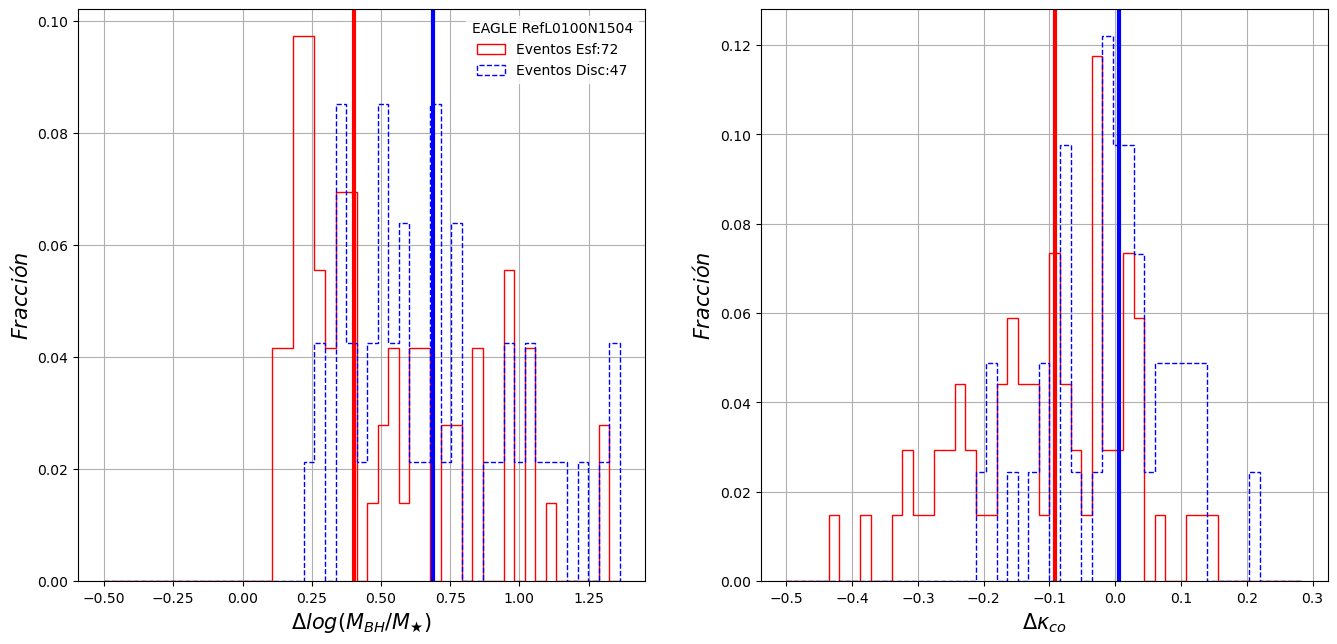

In [25]:
# Histogramas del las variables estudiadas

fig,ax = plt.subplots(1,2,figsize=(14,7))

ax = ax.flatten()

fig.tight_layout(pad=5)

# fontdict ={'fontsize': 40}

# fig.suptitle(r'$Histogramas~de~la~diferencia~entre~magnitudes~post~y~pre~merger~a~z<=3.~Masas~'+str(mass_min)+r'<log(M_\bigstar)<'+str(mass_max)+'.$',fontsize=20)

columnas=50


plt.subplots_adjust(hspace=0.01,left=0.05,top=0.95)



Esf   = True
Disc  = True
Inter = False
Todas = False

# Lista con las alturas de los bines

altura_esf   = []
altura_disc  = []
altura_inter = []
altura_todas = []

i=0
for esf,disc,inter,todas in zip(dif_esf,dif_disc,dif_inter,dif_todas):
    
    width=abs(lim_var[i][1]-lim_var[i][0])/columnas
    
    bins = np.arange(lim_var[i][0],lim_var[i][1],width)
    
    if Esf:
        var = esf
        
        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Eventos Esf:'+str(len(var)),linestyle='-',color='red',linewidth=1,weights=weights)
        median_mayor = pd.Series(var).median(skipna=True)
        perc_inf    = pd.Series(var).quantile(0.25)
        perc_sup    = pd.Series(var).quantile(0.75)
        ax[i].axvline(x = median_mayor, color = 'red',linestyle='-',linewidth=3)
        print('Medianas Esf',median_mayor,i)
#         ax[i].axvline(x = perc_inf, color = 'red',linestyle='--')
#         ax[i].axvline(x = perc_sup, color = 'red',linestyle='--')
        
#         h_var_mayor,b_mayor = np.histogram(var,bins,density=True)
#         ax[i].bar(b_mayor[:-1],height=h_var_mayor * np.diff(b_mayor),width =width,fill=False,color = 'red',edgecolor='red',capsize=4,linestyle='-',linewidth=2,label='Mayor Merger')
#         altura_mayor.append(h_var_mayor * np.diff(b_mayor))
    
    if Disc:
        var = disc

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Eventos Disc:'+str(len(var)),linestyle='--',color='blue',linewidth=1,weights=weights)
        median_minor = pd.Series(var).median(skipna=True)
        perc_inf    = pd.Series(var).quantile(0.25)
        perc_sup    = pd.Series(var).quantile(0.75)
        ax[i].axvline(x = median_minor, color = 'blue',linestyle='-',linewidth=3)
        print('Medianas Disc',median_minor,i)
#         ax[i].axvline(x = perc_inf, color = 'purple',linestyle='--')
#         ax[i].axvline(x = perc_sup, color = 'purple',linestyle='--')
        
        
#         h_var_minor,b_minor = np.histogram(var,bins,density=True)
#         ax[i].bar(b_minor[:-1],height=h_var_minor * np.diff(b_minor),width =width,fill=False,edgecolor='blue',capsize=4,linestyle='--',linewidth=2,label='Minor Merger')
#         altura_minor.append(h_var_minor * np.diff(b_minor))
        
    if Inter:
        var = inter

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Eventos Inter:'+str(len(var)),linestyle='-.',color='purple',linewidth=1,weights=weights)
        median_micro = pd.Series(var).median(skipna=True)
        perc_inf    = pd.Series(var).quantile(0.25)
        perc_sup    = pd.Series(var).quantile(0.75)
        ax[i].axvline(x = median_micro, color = 'purple',linestyle='-',linewidth=3)
        print('Medianas Inter',median_micro,i)
#         ax[i].axvline(x = perc_inf, color = 'b',linestyle='--')
#         ax[i].axvline(x = perc_sup, color = 'b',linestyle='--')
        

#         h_var_micro,b_micro = np.histogram(var,bins,density=True)
#         ax[i].bar(b_micro[:-1],height=h_var_micro * np.diff(b_micro),width =width,fill=False,edgecolor='green',capsize=4,linestyle='--',linewidth=2,label='Micro Merger')
#         altura_micro.append(h_var_micro * np.diff(b_micro))
        
    if Todas:
        var = todas

        weights=np.ones_like(var)/float(len(var))       
        ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Todas:' +str(len(var)),linestyle='-.',color='green',linewidth=1,weights=weights)
        median_non = pd.Series(var).median(skipna=True)
        perc_inf    = pd.Series(var).quantile(0.25)
        perc_sup    = pd.Series(var).quantile(0.75)
        ax[i].axvline(x = median_non, color = 'green',linestyle='-',linewidth=3)
        print('Medianas Todas',median_non,i)
#         ax[i].axvline(x = perc_inf, color = 'green',linestyle='--')
#         ax[i].axvline(x = perc_sup, color = 'green',linestyle='--')
        
#         h_var_non,b_non = np.histogram(var,bins,density=True)
#         ax[i].bar(b_non[:-1],height=h_var_non * np.diff(b_non),width =width,fill=False,edgecolor='indigo',capsize=4,linestyle='--',linewidth=2,label='Non Merger')
#         altura_non.append(h_var_non * np.diff(b_non))
    if i==0:
        leg=ax[i].legend(loc='best',fontsize=10,edgecolor='w',handlelength=2)
        leg.set_title('EAGLE RefL0100N1504', prop = {'size':10})
    ax[i].tick_params(axis='both', which='major', labelsize=10)
    ax[i].set_xlabel(dif_name[i],fontsize=15)
    ax[i].set_ylabel(r'$Fracción$',fontsize=15)
    ax[i].grid()
    i=i+1


# Color mapas para los Major Merger

In [49]:
#Hacemos limpieza de los datos para sacar infinitos y nans

place_inf_Log_BH  = np.where((dif_Log_BH  == np.inf)|(dif_Log_BH  == -np.inf)|(dif_Log_BH  == np.nan))
place_inf_Log_sSFR = np.where((dif_mayor_Log_sSFR== np.inf)|(dif_mayor_Log_sSFR== -np.inf)|(dif_mayor_Log_sSFR== np.nan))

# Nuevas listas sin los elementos que tengan inf o -inf

Log_Star_mass_pre_sub_sSFR = np.delete(masas_sub,place_inf_Log_sSFR)
Log_Star_mass_pre_sub_BH  = np.delete(masas_sub,place_inf_Log_BH)

Red_merger_sub_SFR = np.delete(red_sub,place_inf_Log_SFR)
Red_merger_sub_BH  = np.delete(red_sub,place_inf_Log_BH)

dif_Log_sSFR = np.delete(dif_Log_sSFR,place_inf_Log_SFR)
dif_Log_BH   = np.delete(dif_Log_BH,place_inf_Log_BH)

NameError: name 'place_inf_Log_SFR' is not defined

In [74]:
# Las variables para la tesis

data_masa = {'masas_sub':masas_sub,'red_sub':red_sub,'dif_mayor_Log_SMs':dif_mayor_Log_SMs}

data_OH   = {'masas_sub':masas_sub,'red_sub':red_sub,'dif_mayor_Log_OH':dif_mayor_Log_OH}

data_frac = {'masas_sub':masas_sub,'red_sub':red_sub,'dif_mayor_SFfrac':dif_mayor_SFfrac}

data_sSFR = {'masas_sub':masas_sub,'red_sub':red_sub,'dif_mayor_Log_sSFR':dif_mayor_Log_sSFR}

data_BH   = {'masas_sub':masas_sub,'red_sub':red_sub,'dif_mayor_Log_BH':dif_mayor_Log_BH}

data_Kco  = {'masas_mor':masas_mor,'red_mor':red_mor,'dif_mayor_KcRot':dif_mayor_KcRot}

MASA = pd.DataFrame(data = data_masa)

OH   = pd.DataFrame(data = data_OH)

FRAC = pd.DataFrame(data = data_frac)

sSFR = pd.DataFrame(data = data_sSFR)

BH   = pd.DataFrame(data = data_BH)

KCO  = pd.DataFrame(data = data_Kco)


MASA.replace([np.inf, -np.inf], np.nan, inplace=True)
MASA.dropna(inplace=True)

OH.replace([np.inf, -np.inf], np.nan, inplace=True)
OH.dropna(inplace=True)

FRAC.replace([np.inf, -np.inf], np.nan, inplace=True)
FRAC.dropna(inplace=True)

sSFR.replace([np.inf, -np.inf], np.nan, inplace=True)
sSFR.dropna(inplace=True)

BH.replace([np.inf, -np.inf], np.nan, inplace=True)
BH.dropna(inplace=True)

KCO.replace([np.inf, -np.inf], np.nan, inplace=True)
KCO.dropna(inplace=True)


xvar     = [
            MASA['masas_sub'].values,
            OH['masas_sub'].values, 
            FRAC['masas_sub'].values,
            sSFR['masas_sub'].values,
            BH['masas_sub'].values,
            KCO['masas_mor'].values
            ]

yvar     = [
            MASA['dif_mayor_Log_SMs'].values,
            OH['dif_mayor_Log_OH'][mask_OH].values,
            FRAC['dif_mayor_SFfrac'].values,
            sSFR['dif_mayor_Log_sSFR'].values,
            BH['dif_mayor_Log_BH'].values,
            KCO['dif_mayor_KcRot'].values
           ]

zvar     = [
            MASA['red_sub'].values,
            OH['red_sub'][mask_OH].values,
            FRAC['red_sub'].values,
            sSFR['red_sub'].values,
            BH['red_sub'].values,
            KCO['red_mor'].values
           ]

xlabels  =[r'$Post~log(M_\bigstar)[\rm{M}_\odot]$']

ylabels  = [r'${\Delta}log(M_\bigstar)[\rm{M}_\odot]$',
             r'${\Delta}(12+log(O/H))$',r'${\Delta}F_{SFgas}$',r'${\Delta}log(sSFR)~[yr^{-1}]$',
             r'${\Delta}log(M_{BH}/M_{\bigstar})$',r'${\Delta}\kappa_{co}$']

In [85]:
lim_x = [
        [8,11.7],                      #r'${\Delta}log(M_\bigstar)[\rm{M}_\odot]$'
#         [],                      #r'${\Delta}Log(M_{SF}+M_\bigstar)[\rm{M}_\odot]$'
#         [],                      #r'${\Delta}Log(Z_{Star}/Z_{Sun})$'
        [8,11.7],                      #r'${\Delta}(12+Log(O/H))$'
        [8,11.5],                      #r'${\Delta}F_{SFgas}$'
#         [],                  #r'${\Delta}log(SFR)$'
        [8,11.7],                  #r'${\Delta}log(sSFR)$'
        [8,11.7],                   #r'${\Delta}Log(M_{BH}/M_{\bigstar})$'
#         [],                      #r'${\Delta}RHM30$'
        [8.75,11.7]                       #r'${\Delta}KcRot$'
       ]

lim_y = [
        [-0.1,1],                      #r'${\Delta}log(M_\bigstar)[\rm{M}_\odot]$'
#         [],                      #r'${\Delta}Log(M_{SF}+M_\bigstar)[\rm{M}_\odot]$'
#         [],                      #r'${\Delta}Log(Z_{Star}/Z_{Sun})$'
        [-0.4,0.6],                      #r'${\Delta}(12+Log(O/H))$'
        [-0.4,0.3],                      #r'${\Delta}F_{SFgas}$'
#         [],                  #r'${\Delta}log(SFR)$'
        [-2,1.2],                  #r'${\Delta}log(sSFR)$'
        [-0.2,2.5],                   #r'${\Delta}Log(M_{BH}/M_{\bigstar})$'
#         [],                      #r'${\Delta}RHM30$'
        [-0.5,0.35]                       #r'${\Delta}KcRot$'
       ]

<ipython-input-88-2cfcf0eceabc>:64: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):
<ipython-input-88-2cfcf0eceabc>:134: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.
<ipython-input-88-2cfcf0eceabc>:153: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
<ipython-input-88-2cfcf0eceabc>:64: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):
<ipython-input

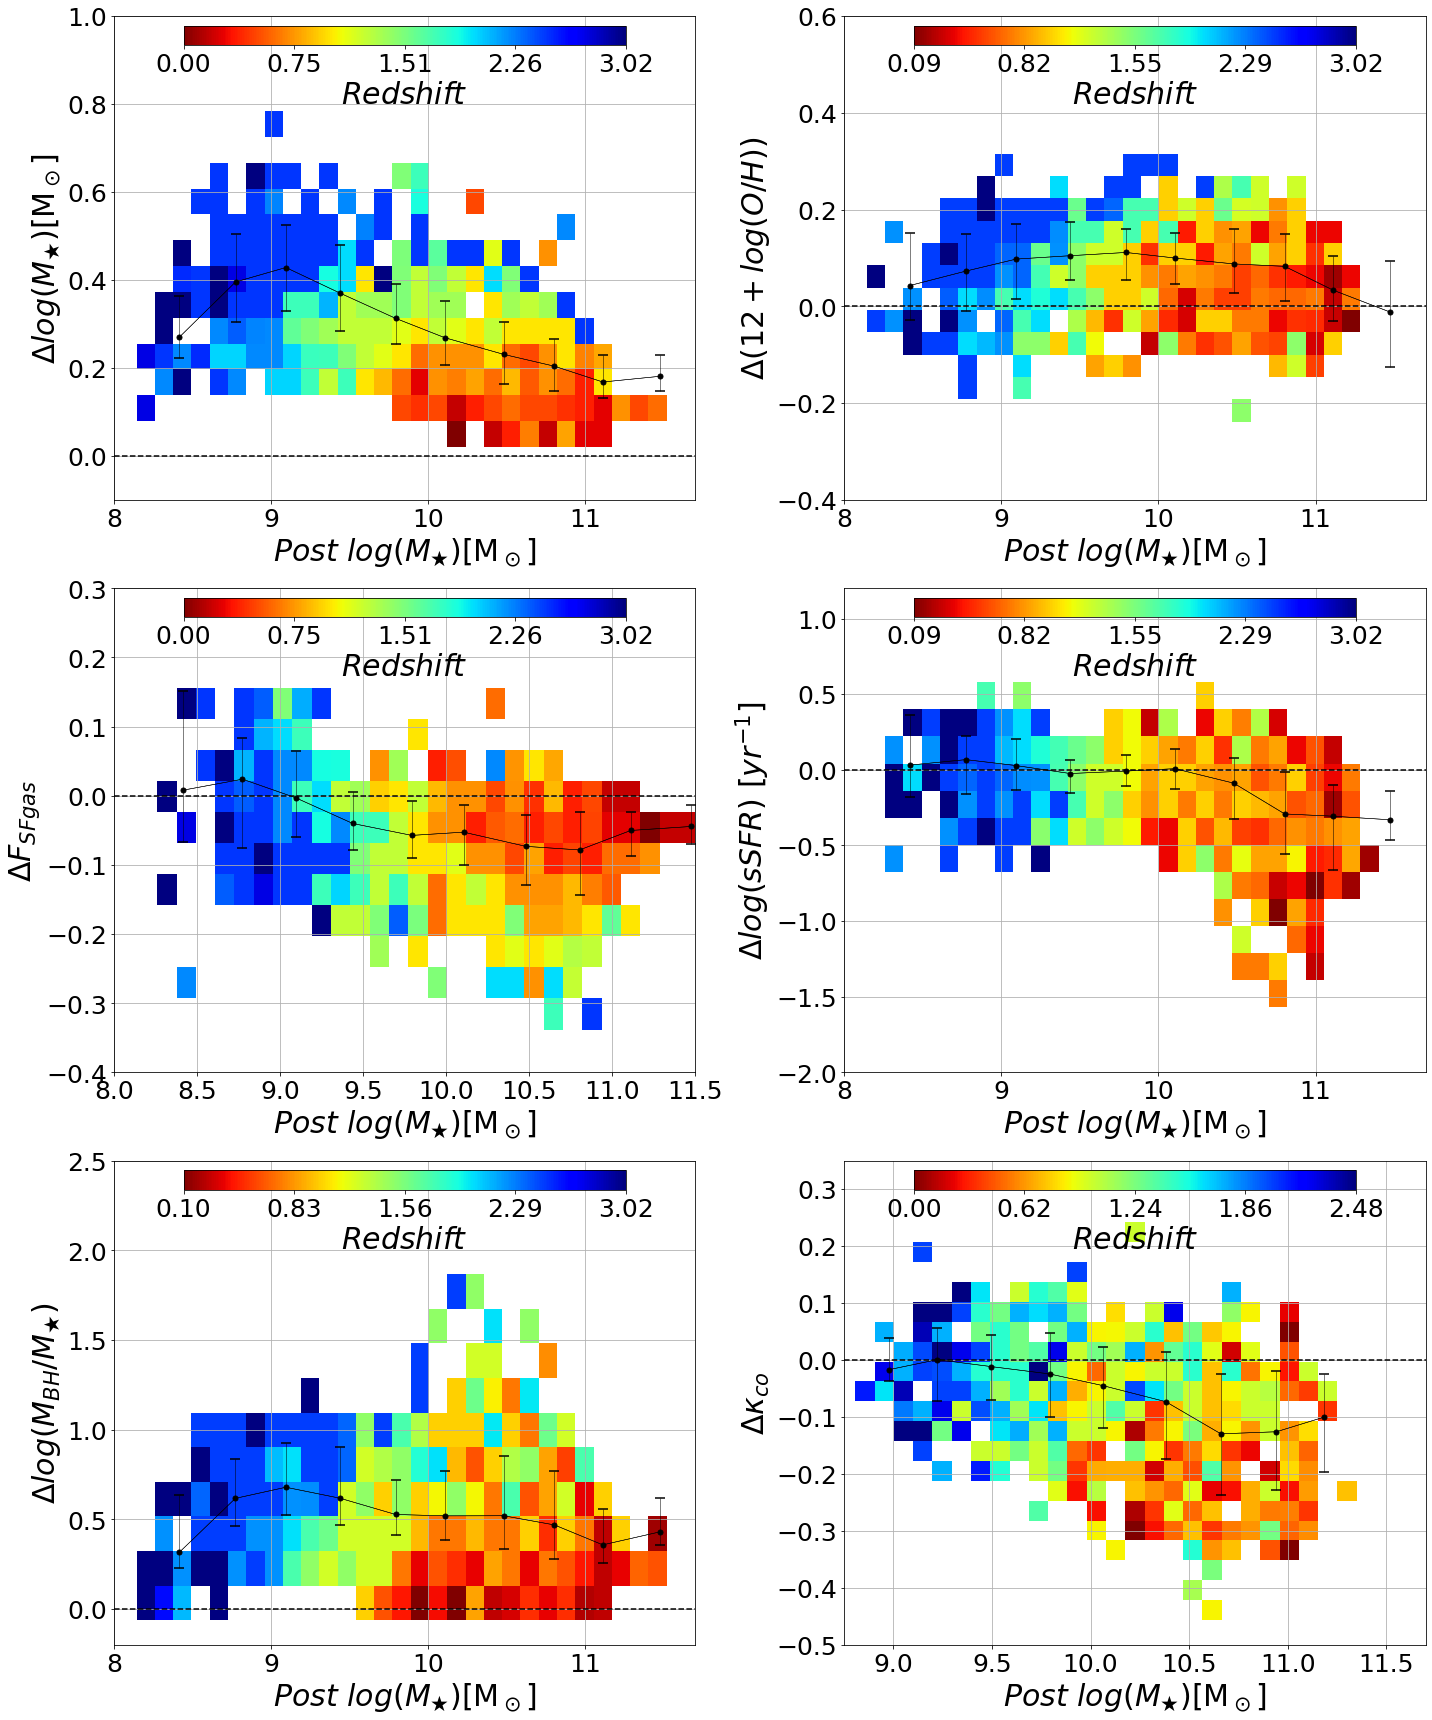

In [88]:
fig,ax = plt.subplots(3,2,figsize=(20,24))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=10.0)

fontdict ={'fontsize': 30}

# fig.suptitle(r'$Scatter\ para\ la\ diferencia\ de\ magnitudes\ post\ y\ pre\ mergers, coloreando\ según\ redshift\ y\ tamaños\ según\ la\ masa\ pre\ merger.$', fontsize=30)

# Para el calculo de las medianas

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=15         # Mínima cantidad de elementos para considerar en un bin

k=0
for varx,vary,labely,varz in zip(xvar,yvar,ylabels,zvar):

        # Parámetro que colorea
        parametro= varz

        # Variables (ejes) a graficar
        xplot = varx
        yplot = vary

        xlabel= xlabels[0]
        ylabel= labely

        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xplot,yplot,bins=nbins,min_count=min_count,
                                                                     perc_low=perc_low,perc_high=perc_high)

        #-------------------- Variables para pintar grilla 2D-----------------------------------------------
        # Variable a usar para colorear
        var_color= parametro

        # Estadístico a usar ('counts','mean','median')
        statistic='median'

        # 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
        # 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.

        # Label to use in color bar reference
        var_label=r'$Redshift$'

        # Número de bines en cada eje
        nbinsx=30
        nbinsy=25

        # Minimum number of galaxies to color bin (bins with less galaxies than this value will
        # not be taken into account)
        cmin=3

        # Color map to use. Use 'mapname_r' to invert colours. For example, if want to
        # invert the color map "jet", use "jet_r".
        cmap='jet_r'


        # Intervals of binning, as function of nbinsx and nbinsy:
        intx=(max(xplot)-min(xplot))/nbinsx
        inty=(max(yplot)-min(yplot))/nbinsy

        # If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
        if (var_color==[]) or (statistic=='counts'):   
            # Min and Max of each variable
            xmin,xmax=min(xplot),max(xplot)
            xlim=[xmin,xmax]

            ymin,ymax = min(yplot),max(yplot)
            ylim = [ymin,ymax]
        
            # Construct the 2D histogram
            hist2d,xedges,yedges,im=ax[k].hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                              range=(xlim,ylim),cmin=cmin)
            var_label='N'
        
         # If not want to plot a 2D histogram, construct the color map
        else:
         #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
                    density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                             # order to use 'meshgrid' later.

                    # Calculate the desired statistic in each bin
                    auxx=min(xplot)
                    for i in range(nbinsx+1):
                        auxy=min(yplot)
                        for j in range(nbinsy+1):
                            # Select data of elements that belong to the bin
                            var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                            # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                            if (var.size >=cmin):
                                if statistic=='mean':
                                    stat_val=np.mean(var)
                                elif statistic=='median':
                                    stat_val=np.median(var)                        
                            # If not enough elements in the bin, assign the value -1e99 to the statistic        
                            else:
                                stat_val=-1e99
                
                            # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                            density[j,i]=stat_val
                            auxy=auxy+inty
                        auxx=auxx+intx

                    # Define x-coordinates of 2D grid
                    x=np.zeros(nbinsx+1)
                    auxx=min(xplot)
                    for i in range(nbinsx+1):
                        x[i]=auxx
                        auxx=auxx+intx

                    # Define y-coordinates of 2D grid
                    y=np.zeros(nbinsy+1)
                    auxy=min(yplot)
                    for j in range(nbinsy+1):
                        y[j]=auxy
                        auxy=auxy+inty

                    # Construct two 2D array with grid coordinates
                    x,y=np.meshgrid(x,y)

                    # Define again the density (statistic) array
                    z=density

                    # IMPORTANT!!: x, y, z MUST have the same shape.

                    # Search min and max of statistic, considering only bins with "well-defined" statistic
                    densitylim=density[density > -1e99]
                    vmin=np.amin(densitylim)
                    vmax=np.amax(densitylim)
 
                    # Prepare the color map
                    cmap = plt.get_cmap(cmap)       # Name of the color map
                    cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
                    norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

                    # Construct color grid
                    im=ax[k].pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

        # Barra de referencia y "tuneo" del gráfico
        # Add an axis that will contain the color bar 
        cbaxes=ax[k].inset_axes([0.12,0.94,0.76,0.04]) 

        # Construct color bar using the color grid (object 'im')
        cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
        cbar.set_label(var_label,fontsize=30)    # Label of color bar
        cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

        # Number of ticks in color bar
        loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
        cbar.locator=loc
        cbar.update_ticks()
        if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
            cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
        else:
            cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

        # Ajustar cosas del gráfico
        ax[k].set_xlabel(str(xlabels[0]),fontsize=30)
        ax[k].set_ylabel(str(labely),fontsize=30)

#         xmin,xmax=min(xplot)*0.98,max(xplot)*1.03
        xmin,xmax = lim_x[k][0],lim_x[k][1]
        ax[k].set_xlim(xmin,xmax)


#         ymin,ymax=min(yplot)*0.98,max(yplot)*1.03
        ymin,ymax= lim_y[k][0],lim_y[k][1]
        ax[k].set_ylim(ymin,ymax)

        ax[k].tick_params(axis='both',labelsize=25)

        ax[k].plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

        ax[k].errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Percentiles 25% y 75%',capsize=5,capthick=1.5)

        # leg1 = ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=15)
        # leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

        # ax.add_artist(leg1)

        fig.tight_layout()
        ax[k].hlines(0, xmin, xmax, colors='k', linestyles='--')
        ax[k].grid()
        k = k+1                                                      

# Guardar la figura, si es necesario
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/colormap_dif_magnitudes.pdf')
    
plt.show()

In [79]:
# Fin

,masas_sub,red_sub,dif_mayor_SFfrac
0,10.888315,1.004122e+00,-0.185428
1,9.935479,3.016504e+00,-0.096593
2,11.086611,3.656686e-01,-0.071913
3,9.334060,2.478413e+00,-0.040858
4,10.655792,2.478413e+00,-0.109409
...,...,...,...
1932,9.754353,1.004122e+00,-0.076344
1933,10.148490,2.220446e-16,-0.122062
1934,9.674396,1.259332e+00,-0.040034
1935,8.873908,2.478413e+00,-0.077110
